# Data Generation and Statistical Test


In [59]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Import custom libraries
import os 
import sys
sys.path.append('../')

import Util.data_check

## Data Preparation

In [60]:
data_path1 = '../Data/'
data_path2 = '../data/'

# Check which path exists
if os.path.exists(data_path1):
    data_path = data_path1
elif os.path.exists(data_path2):
    data_path = data_path2
else:
    raise FileNotFoundError("Neither data_path1 nor data_path2 exists")

In [61]:
# set random seed for reproducibility
np.random.seed(42)

# Beispiel Daten laden
file_name = 'preprocessed_df_v2.csv'
file_path = os.path.join(data_path, file_name)

data = pd.read_csv(file_path)

In [62]:
data.head()

,participant_id,test_id,test_duration,mental,physical,temporal,performance,effort,frustration,mean,...,fixationrate_rel,fixationrate_rel_pct,mean_pupil_diameter_rel,mean_pupil_diameter_rel_pct,median_pupil_diameter_rel,median_pupil_diameter_rel_pct,visual_acuity_logmar,gender,age,education
0,1,1,33.643950,10,5,15,25,25,10,15.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.04,0,28,18
1,1,2,28.484322,50,30,25,50,15,25,32.5,...,-0.120413,-40.687440,-0.919996,-2.097788,-0.872377,-1.987465,-0.04,0,28,18
2,1,3,71.423823,100,10,75,80,90,20,62.5,...,-0.099928,-33.765546,0.848925,1.935731,0.897654,2.045050,-0.04,0,28,18
3,1,4,38.163442,60,15,45,50,20,25,35.8,...,-0.007684,-2.596309,1.906622,4.347507,1.951494,4.445927,-0.04,0,28,18
4,2,1,41.748047,20,10,20,10,20,15,15.8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.10,0,28,18


In [63]:
print(data.columns.to_list())

['participant_id', 'test_id', 'test_duration', 'mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean', 'mean_pupil_diameter', 'median_pupil_diameter', 'blinkrate', 'fixationrate', 'blinkrate_rel', 'blinkrate_rel_pct', 'fixationrate_rel', 'fixationrate_rel_pct', 'mean_pupil_diameter_rel', 'mean_pupil_diameter_rel_pct', 'median_pupil_diameter_rel', 'median_pupil_diameter_rel_pct', 'visual_acuity_logmar', 'gender', 'age', 'education']


In [64]:
# Entfernen der berechneten relativen Features 
columns_to_drop = ['blinkrate_rel', 'blinkrate_rel_pct', 'fixationrate_rel', 'fixationrate_rel_pct', 'mean_pupil_diameter_rel', 'mean_pupil_diameter_rel_pct', 'median_pupil_diameter_rel', 'median_pupil_diameter_rel_pct']
data = data.drop(columns_to_drop, axis=1)
print(data.columns.to_list())

['participant_id', 'test_id', 'test_duration', 'mental', 'physical', 'temporal', 'performance', 'effort', 'frustration', 'mean', 'mean_pupil_diameter', 'median_pupil_diameter', 'blinkrate', 'fixationrate', 'visual_acuity_logmar', 'gender', 'age', 'education']


In [65]:
discrete_columns = ['gender', 'education']  
continuous_columns = [col for col in data.columns if col not in discrete_columns]

In [66]:
# Daten skalieren
scaler = MinMaxScaler()
data_continuous_scaled = scaler.fit_transform(data[continuous_columns])

# Dimension der Eingabedaten
input_dim = data_continuous_scaled.shape[1]

In [67]:
# Generate synthetic continuous data
means = np.mean(data_continuous_scaled, axis=0)
stds = np.std(data_continuous_scaled, axis=0)
num_additional_points = 1000
synthetic_data_continuous_scaled = np.random.normal(loc=means, scale=stds, size=(num_additional_points, data_continuous_scaled.shape[1]))

# Inverse transform to get the original scale
synthetic_data_continuous = scaler.inverse_transform(synthetic_data_continuous_scaled)
synthetic_data_continuous_df = pd.DataFrame(synthetic_data_continuous, columns=continuous_columns)

# Calculate distributions for discrete columns
discrete_distributions = {col: data[col].value_counts(normalize=True) for col in discrete_columns}

# Generate synthetic discrete data based on distributions
synthetic_data_discrete = {}
for col in discrete_columns:
    values = discrete_distributions[col].index.tolist()
    probabilities = discrete_distributions[col].values.tolist()
    synthetic_data_discrete[col] = np.random.choice(values, size=num_additional_points, p=probabilities)

# Convert synthetic discrete data to DataFrame
synthetic_data_discrete_df = pd.DataFrame(synthetic_data_discrete)

# Combine synthetic continuous and discrete data
synthetic_data_combined_df = pd.concat([synthetic_data_continuous_df, synthetic_data_discrete_df], axis=1)

# Combine synthetic data with original data
augmented_data = pd.concat([data, synthetic_data_combined_df], ignore_index=True)

# Output shapes
print("Original Data Shape:", data.shape)
print("Synthetic Data Shape:", synthetic_data_combined_df.shape)
print("Augmented Data Shape:", augmented_data.shape)

Original Data Shape: (188, 18)
Synthetic Data Shape: (1000, 18)
Augmented Data Shape: (1188, 18)


In [68]:
# Ausgabe der ersten 5 Zeilen
print(augmented_data[:5])

   participant_id  test_id  test_duration  mental  physical  temporal  \
0             1.0      1.0      33.643950    10.0       5.0      15.0   
1             1.0      2.0      28.484322    50.0      30.0      25.0   
2             1.0      3.0      71.423823   100.0      10.0      75.0   
3             1.0      4.0      38.163442    60.0      15.0      45.0   
4             2.0      1.0      41.748047    20.0      10.0      20.0   

   performance  effort  frustration  mean  mean_pupil_diameter  \
0         25.0    25.0         10.0  15.0            43.855534   
1         50.0    15.0         25.0  32.5            42.935538   
2         80.0    90.0         20.0  62.5            44.704459   
3         50.0    20.0         25.0  35.8            45.762156   
4         10.0    20.0         15.0  15.8            31.492393   

   median_pupil_diameter  blinkrate  fixationrate  visual_acuity_logmar  \
0              43.893976   0.059446      0.295946                 -0.04   
1             

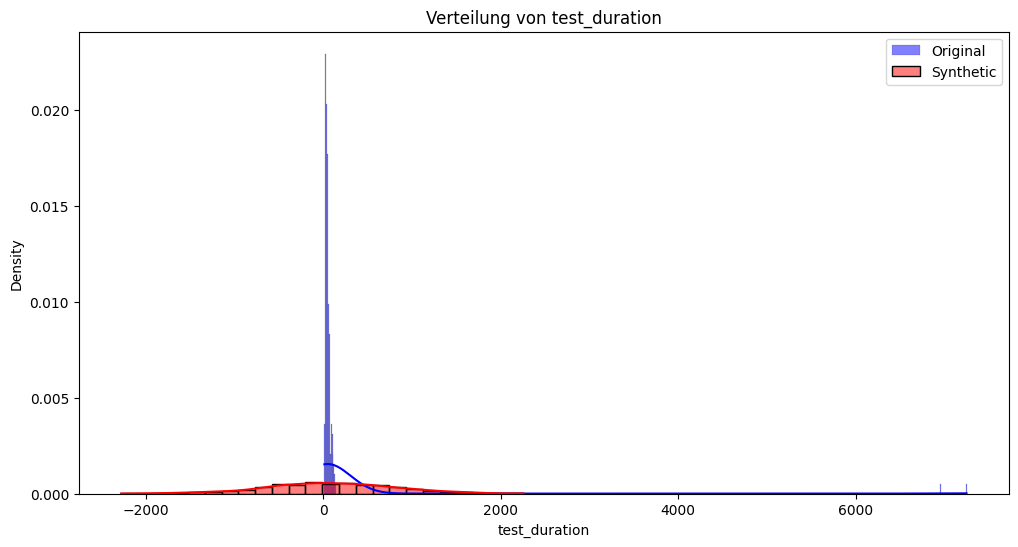

Normalitätstest für test_duration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für test_duration:
Statistik = 0.06389855682588355, p-Wert = 0.800436957258449
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



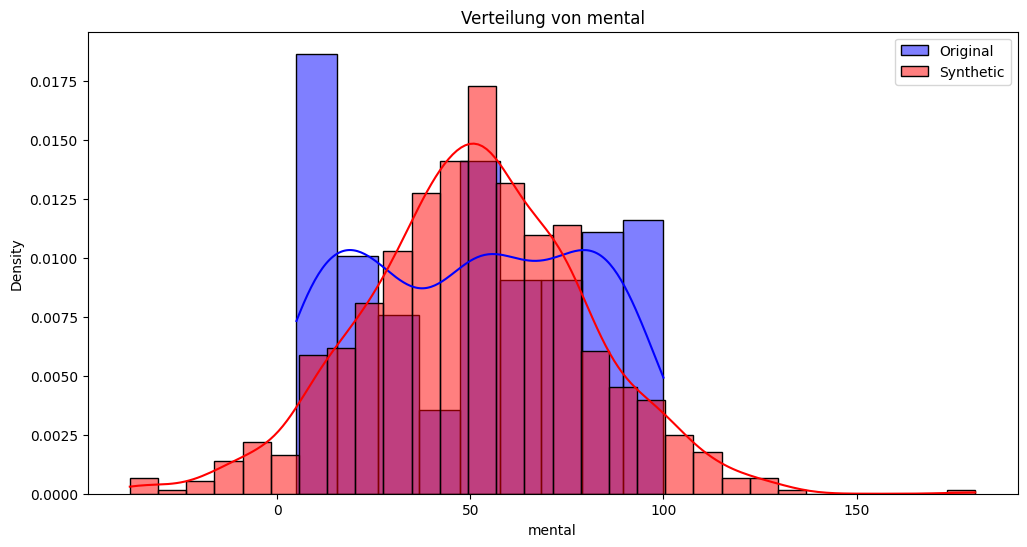

Normalitätstest für mental:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mental:
Statistik = 0.12143531074624178, p-Wert = 0.7274829630916497
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



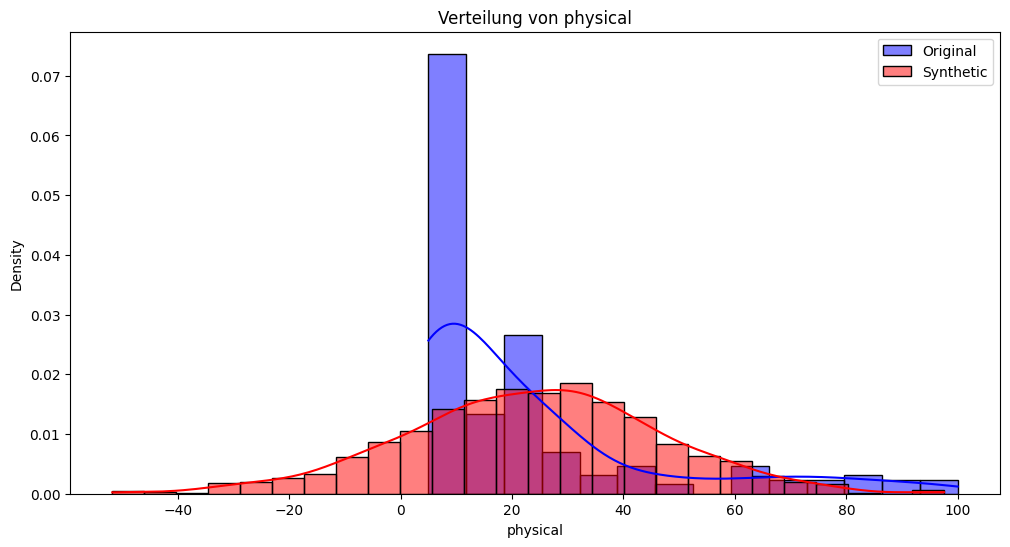

Normalitätstest für physical:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für physical:
Statistik = 9.560376516715761, p-Wert = 0.0019882232412318187
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



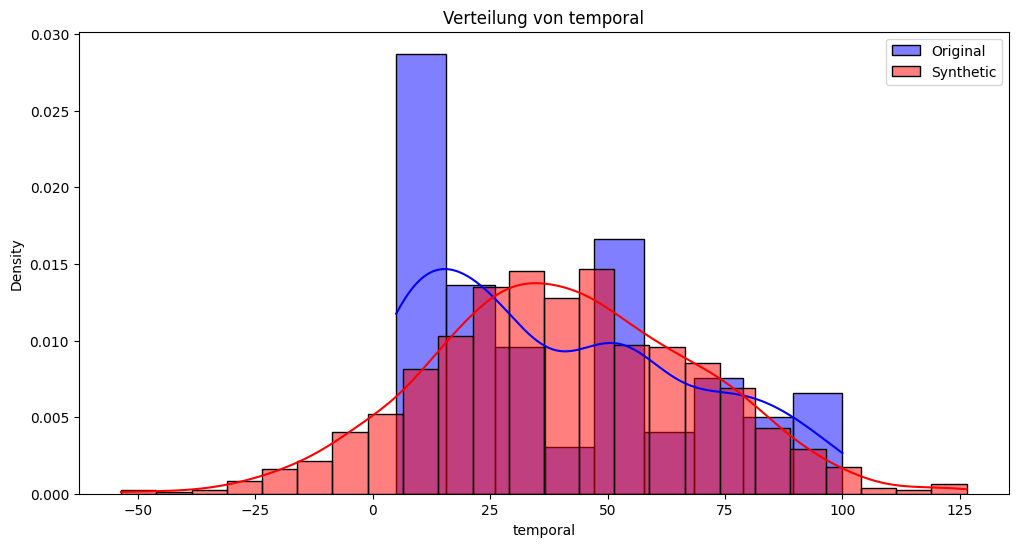

Normalitätstest für temporal:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für temporal:
Statistik = 1.8466759716080576, p-Wert = 0.17417049398435647
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



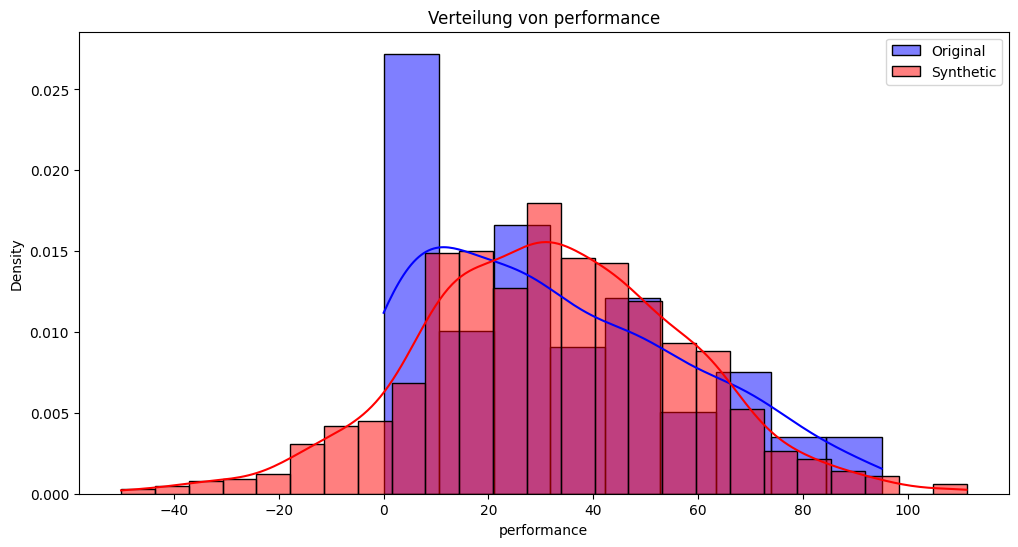

Normalitätstest für performance:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für performance:
Statistik = 0.6006808895902858, p-Wert = 0.43831835372734795
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



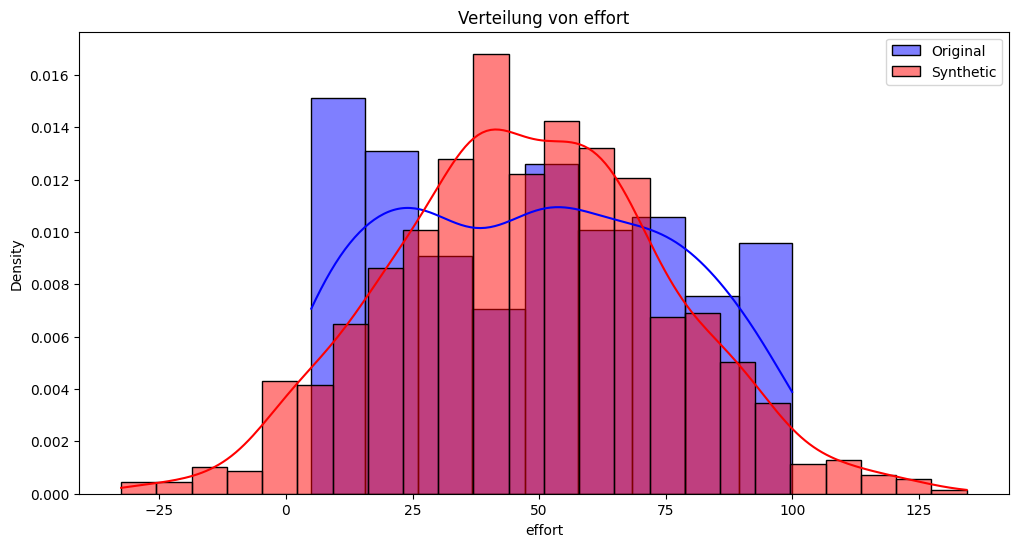

Normalitätstest für effort:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für effort:
Statistik = 0.004360513877929168, p-Wert = 0.9473506074008685
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



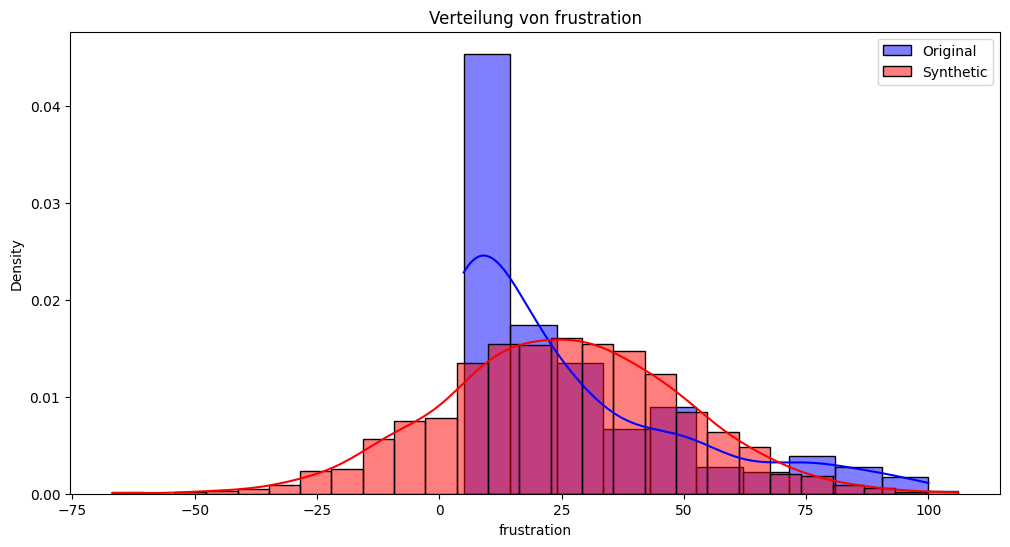

Normalitätstest für frustration:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für frustration:
Statistik = 3.464651300560052, p-Wert = 0.06269372488441123
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



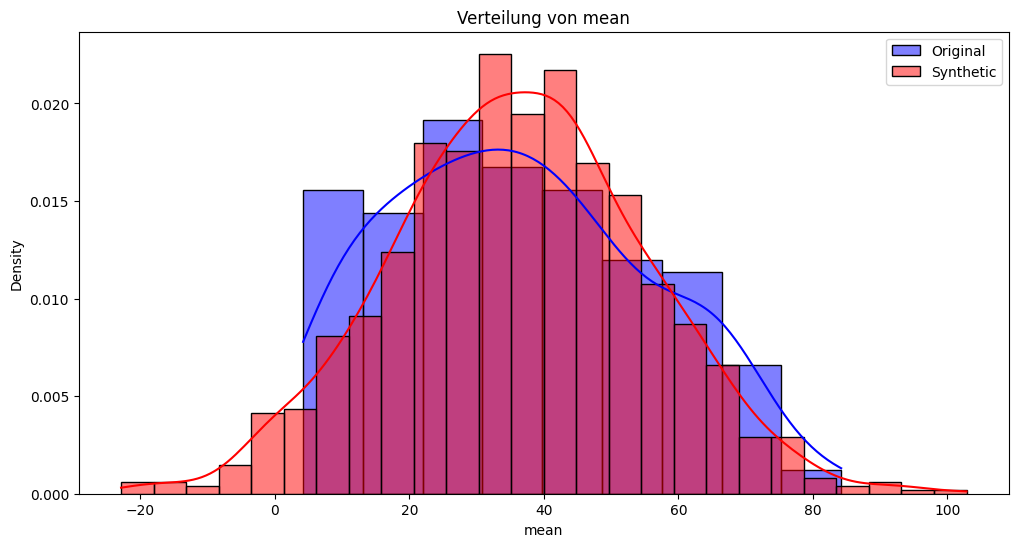

Normalitätstest für mean:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean:
Statistik = 0.1644061852372718, p-Wert = 0.6851318263222268
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



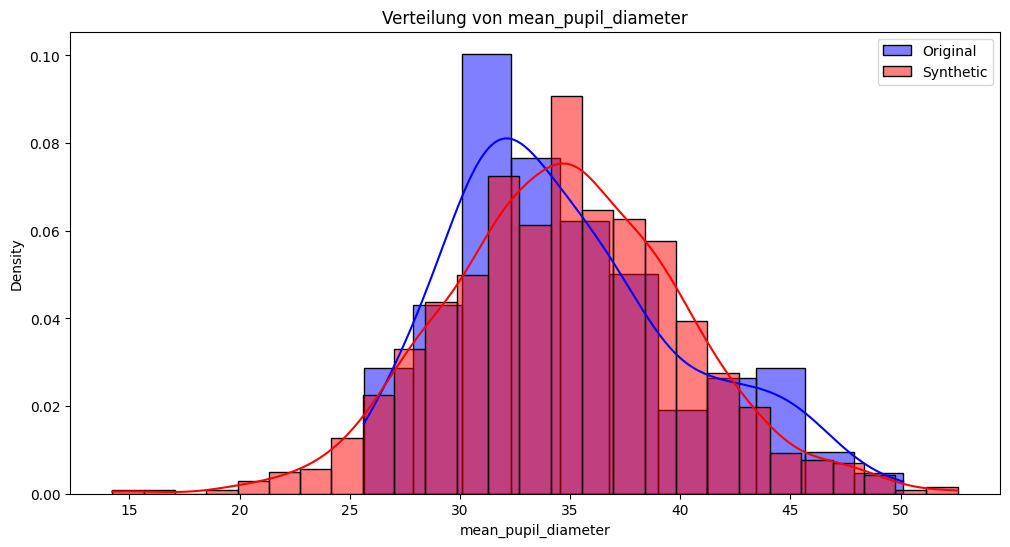

Normalitätstest für mean_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für mean_pupil_diameter:
Statistik = 0.5168982948927622, p-Wert = 0.47216778842987484
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



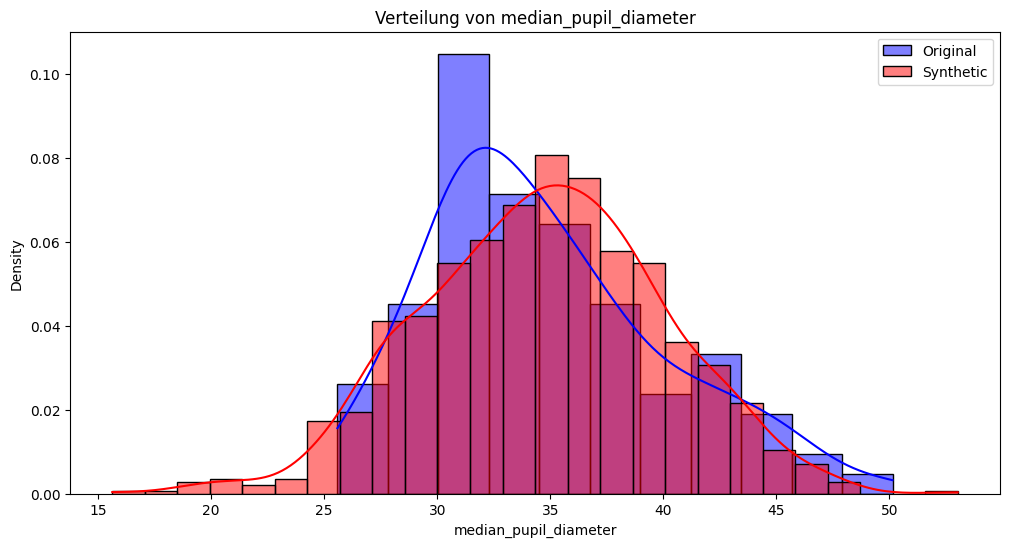

Normalitätstest für median_pupil_diameter:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für median_pupil_diameter:
Statistik = 0.732546724155011, p-Wert = 0.39205893958861127
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



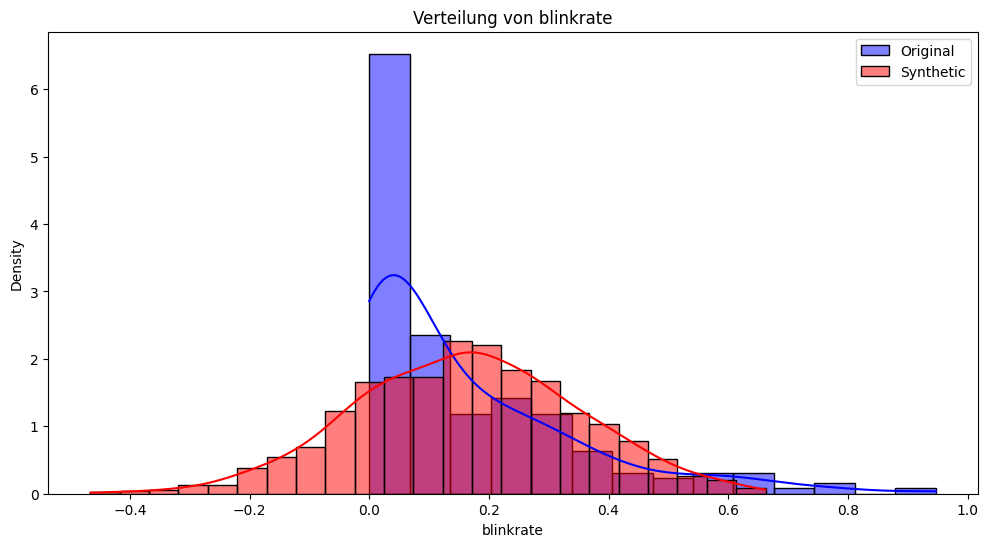

Normalitätstest für blinkrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für blinkrate:
Statistik = 3.9007110801599376, p-Wert = 0.04826567500821967
Die Verteilungen sind signifikant unterschiedlich (Nullhypothese verworfen).



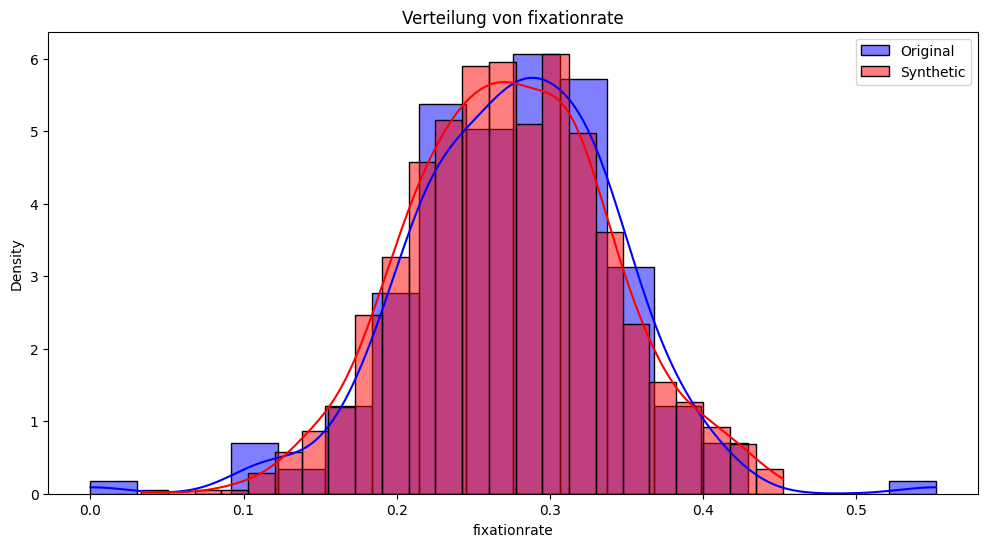

Normalitätstest für fixationrate:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für fixationrate:
Statistik = 0.5992313132673863, p-Wert = 0.43887146527251375
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



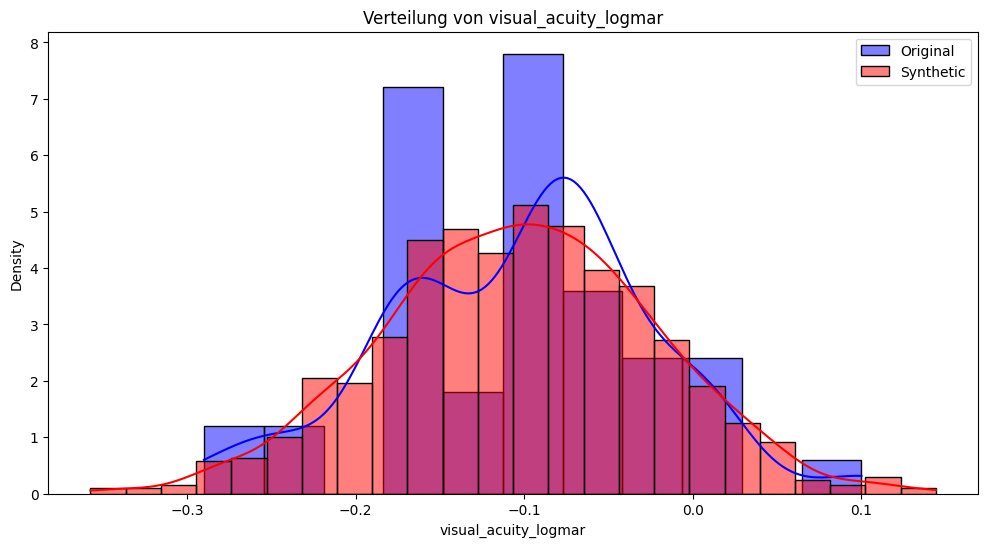

Normalitätstest für visual_acuity_logmar:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für visual_acuity_logmar:
Statistik = 0.011360090941219826, p-Wert = 0.9151192287118475
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



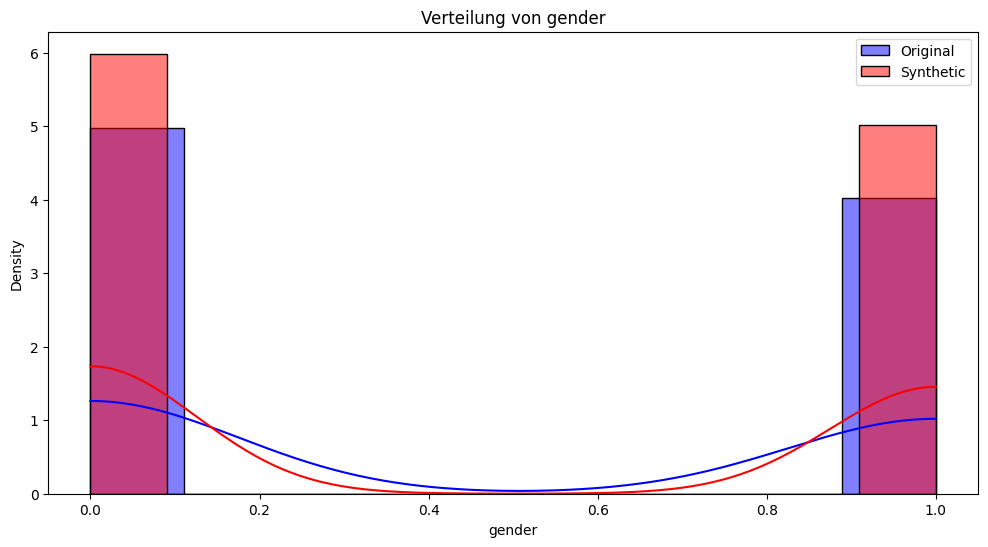

Normalitätstest für gender:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für gender:
Statistik = 0.05387801418366976, p-Wert = 0.8164476223454247
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



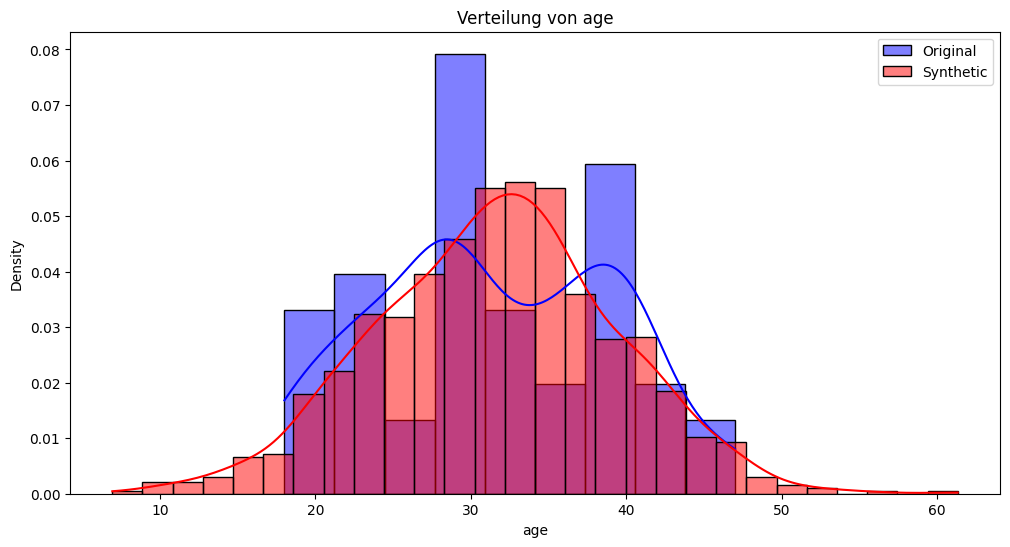

Normalitätstest für age:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Normalverteilt
Kruskal-Wallis H-Test für age:
Statistik = 0.09128594602025412, p-Wert = 0.7625486631083618
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



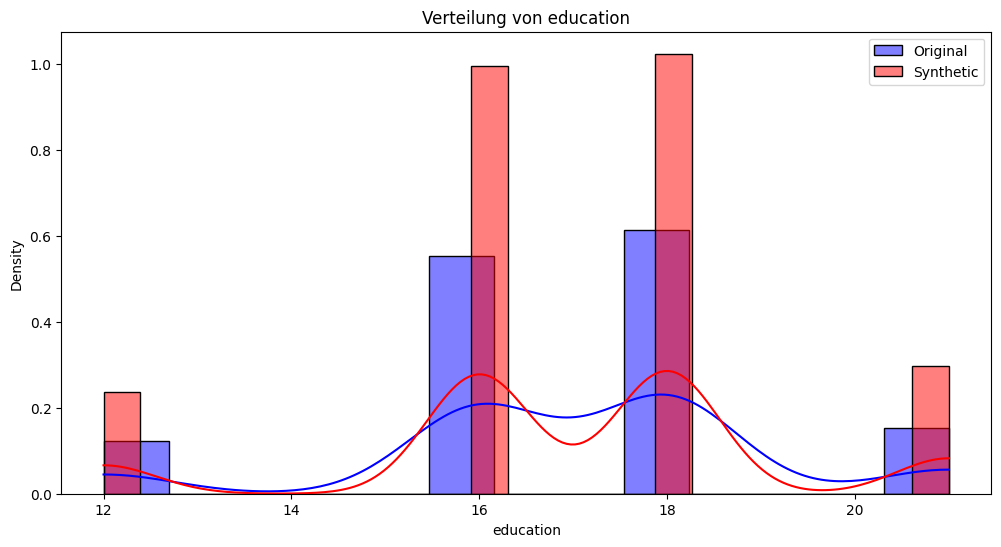

Normalitätstest für education:
Originaldaten: Nicht-normalverteilt
Generierte Daten: Nicht-normalverteilt
Kruskal-Wallis H-Test für education:
Statistik = 0.06152548017296792, p-Wert = 0.8041009025070432
Die Verteilungen sind ähnlich (Nullhypothese nicht verworfen).



In [69]:

# Getrennte DataFrames für Original- und generierte Daten
original_df = data.copy()
synthetic_df = augmented_data.iloc[len(data):].copy()

# Werte prüfen. Ausgabe als Plot und Text
Util.data_check.compare_distributions(original_df, synthetic_df)

In [70]:
# Merge original and synthetic data, then save to disk
# We want to count up the participant_id

max_participant_id = max(data['participant_id'].values)
print(f"We'll continue from participant_id {max_participant_id} onwards.")

We'll continue from participant_id 47 onwards.


In [71]:
# print values of participant_id in augmented data
print(augmented_data['participant_id'])

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        2.000000
          ...    
1183    25.799822
1184     6.918084
1185    12.394990
1186    17.024924
1187    14.590243
Name: participant_id, Length: 1188, dtype: float64


In [72]:
num_synth_participants = synth_data.shape[0] // 4
new_participant_ids = np.arange(max_participant_id + 1, max_participant_id + 1 + num_synth_participants)

print(f"Number of new participants: {num_synth_participants}")

Number of new participants: 0
